# Video Game Sentiment & Ratings Analysis
This project explores a large dataset of 47,000+ video games, combining gameplay features, user ratings, and player reviews. The main goal is to uncover what drives positive or negative feedback using sentiment analysis and exploratory data analysis. By examining factors like genre, platform, price, and user sentiment, we aim to identify patterns that influence player satisfaction. This project showcases key Python data analysis skills including text mining, visualization, and insight generation.

In [1]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 330.3 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/299.9 kB 393.8 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/299.9 kB 409.6 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/299.9 kB 898.2 kB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...


True

In [3]:
df = pd.read_excel("Video Games python.xlsx", sheet_name="Sheet1")
df.head()

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,27,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [4]:
# Shape of the dataset
df.shape

(1000, 18)

In [5]:
# Data types
df.dtypes

Game Title                  object
User Rating                  int64
Age Group Targeted          object
Price                      float64
Platform                    object
Requires Special Device     object
Developer                   object
Publisher                   object
Release Year                 int64
Genre                       object
Multiplayer                 object
Game Length (Hours)        float64
Graphics Quality            object
Soundtrack Quality          object
Story Quality               object
User Review Text            object
Game Mode                   object
Min Number of Players        int64
dtype: object

In [6]:
# Missing values
df.isnull().sum()

Game Title                 0
User Rating                0
Age Group Targeted         0
Price                      0
Platform                   0
Requires Special Device    0
Developer                  0
Publisher                  0
Release Year               0
Genre                      0
Multiplayer                0
Game Length (Hours)        0
Graphics Quality           0
Soundtrack Quality         0
Story Quality              0
User Review Text           0
Game Mode                  0
Min Number of Players      0
dtype: int64

In [7]:
# Unique values per column
df.nunique()

Game Title                  40
User Rating                 38
Age Group Targeted           4
Price                      881
Platform                     5
Requires Special Device      2
Developer                   10
Publisher                    9
Release Year                14
Genre                       10
Multiplayer                  2
Game Length (Hours)        461
Graphics Quality             4
Soundtrack Quality           4
Story Quality                4
User Review Text            12
Game Mode                    2
Min Number of Players        9
dtype: int64

In [8]:
# Renaming columns for easier access 
df.columns = [col.strip().replace(" ", "_") for col in df.columns]
df.head()

,Game_Title,User_Rating,Age_Group_Targeted,Price,Platform,Requires_Special_Device,Developer,Publisher,Release_Year,Genre,Multiplayer,Game_Length_(Hours),Graphics_Quality,Soundtrack_Quality,Story_Quality,User_Review_Text,Game_Mode,Min_Number_of_Players
0,Grand Theft Auto V,36,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,27,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Check for out-of-range ratings
df = df[df.User_Rating.between(0, 100)]

## Exploratory Data Analysis (EDA)

In [11]:
# Top 10 highest-rated games

df.sort_values(by="User_Rating", ascending=False).head(10)

,Game_Title,User_Rating,Age_Group_Targeted,Price,Platform,Requires_Special_Device,Developer,Publisher,Release_Year,Genre,Multiplayer,Game_Length_(Hours),Graphics_Quality,Soundtrack_Quality,Story_Quality,User_Review_Text,Game_Mode,Min_Number_of_Players
169,Minecraft,48,Kids,58.08,Xbox,No,Valve,Square Enix,2014,Action,No,57.8,High,Poor,Average,"Great game, but the gameplay is amazing.",Offline,7
527,Super Smash Bros. Ultimate,48,Kids,59.65,PlayStation,No,Bungie,Square Enix,2011,Strategy,No,57.9,Low,Good,Average,"Solid game, but the graphics could be better.",Online,4
949,FIFA 24,47,Kids,59.71,Xbox,No,Innersloth,Capcom,2023,Party,No,59.5,Low,Excellent,Good,"Disappointing game, but the gameplay is amazing.",Offline,3
828,Pillars of Eternity II: Deadfire,47,Adults,57.17,PC,No,Bungie,Capcom,2021,Strategy,No,58.9,Low,Average,Excellent,"Disappointing game, but the graphics could be ...",Offline,6
606,Kingdom Hearts III,46,Adults,59.73,Nintendo Switch,Yes,Game Freak,Innersloth,2015,Simulation,No,48.0,Ultra,Poor,Poor,"Great game, but too many bugs.",Offline,2
929,Kingdom Hearts III,46,Teens,56.97,Xbox,Yes,Rockstar Games,Epic Games,2011,Adventure,No,57.1,Low,Poor,Good,"Disappointing game, but the graphics could be ...",Offline,7
123,1000-Piece Puzzle,46,Teens,58.75,PlayStation,No,CD Projekt Red,Innersloth,2019,Strategy,No,50.1,High,Excellent,Excellent,"Amazing game, but the gameplay is amazing.",Online,2
872,Among Us,46,Adults,56.71,Xbox,Yes,CD Projekt Red,Innersloth,2011,Simulation,Yes,55.1,Ultra,Good,Poor,"Solid game, but the graphics could be better.",Online,5
99,Half-Life: Alyx,46,Kids,56.41,Mobile,No,Epic Games,Electronic Arts,2017,Action,Yes,55.7,Medium,Good,Good,"Solid game, but too many bugs.",Offline,1
149,Sid Meier’s Civilization VI,46,Kids,56.32,Nintendo Switch,No,Innersloth,Valve,2011,RPG,No,57.2,Medium,Good,Poor,"Amazing game, but too many bugs.",Offline,3


In [12]:
# Average rating by genre

df.groupby("Genre")["User_Rating"].mean().sort_values(ascending=False)

Genre
RPG           30.429907
Puzzle        30.032967
Adventure     29.992248
Strategy      29.822917
Fighting      29.663462
Sports        29.452381
Simulation    29.352273
Shooter       29.280374
Party         29.170213
Action        28.860000
Name: User_Rating, dtype: float64

In [13]:
# Game count by platform

df.Platform.value_counts()

Platform
PC                 226
Mobile             204
Nintendo Switch    195
PlayStation        192
Xbox               183
Name: count, dtype: int64

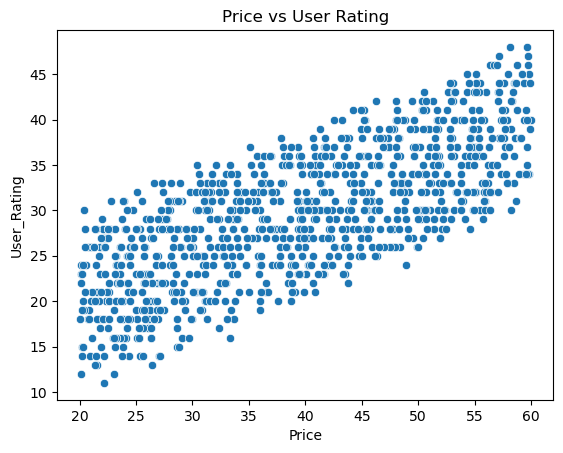

In [14]:
# Price vs Rating 

sns.scatterplot(data=df, x="Price", y="User_Rating")
plt.title("Price vs User Rating")
plt.show()

<Axes: xlabel='User_Rating', ylabel='Count'>

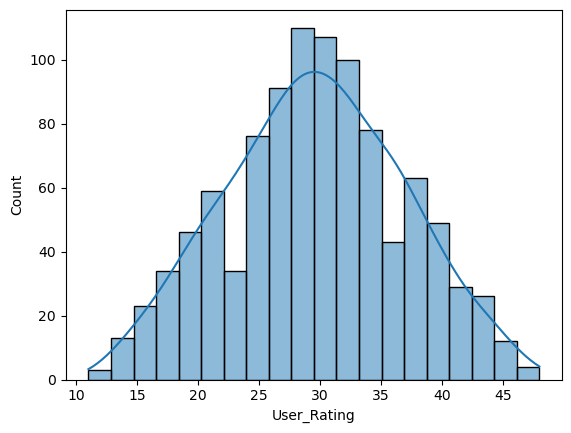

In [15]:
# Rating distribution

sns.histplot(df["User_Rating"], bins=20, kde=True)

In [16]:
# Multiplayer vs Single-player average ratings

df.groupby("Multiplayer")["User_Rating"].mean()

Multiplayer
No     29.687379
Yes    29.556701
Name: User_Rating, dtype: float64

In [17]:
# Average Game Length by Genre

df.groupby("Genre")["Game_Length_(Hours)"].mean().sort_values(ascending=False)

Genre
Sports        34.721429
Strategy      34.353125
RPG           34.177570
Action        34.116000
Adventure     33.331783
Puzzle        32.847253
Simulation    31.956818
Party         31.405319
Fighting      31.315385
Shooter       31.047664
Name: Game_Length_(Hours), dtype: float64

<Axes: xlabel='Age_Group_Targeted', ylabel='User_Rating'>

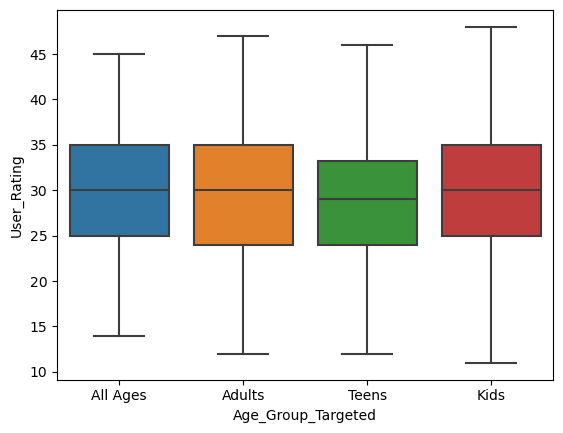

In [18]:
# Ratings by Age Group

sns.boxplot(x="Age_Group_Targeted", y="User_Rating", data=df)

In [19]:
# Platform-wise average prices

df.groupby("Platform")["Price"].mean().sort_values(ascending=False)

Platform
PlayStation        39.843073
Xbox               39.698087
PC                 39.490796
Mobile             39.099020
Nintendo Switch    39.008615
Name: Price, dtype: float64

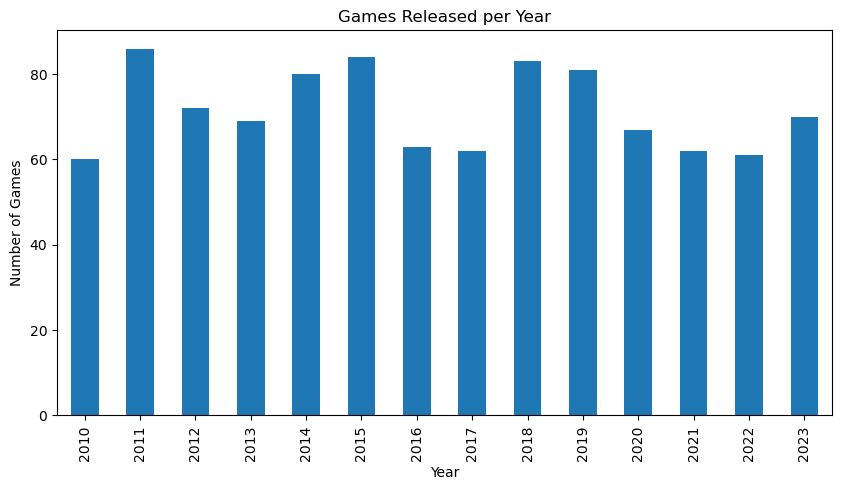

In [20]:
# Count of games by release year

df["Release_Year"].value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.title("Games Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.show()

## Sentiment Analysis

In [21]:
# Initialize VADER

sid = SentimentIntensityAnalyzer()

In [22]:
# Apply sentiment scores to User Review Text

df["sentiment_scores"] = df["User_Review_Text"].apply(lambda review: sid.polarity_scores(str(review)))
df["compound_score"] = df["sentiment_scores"].apply(lambda score_dict: score_dict['compound'])

In [23]:
# Classify reviews by sentiment

df["sentiment_type"] = df["compound_score"].apply(
    lambda x: "Positive" if x >= 0.05 else ("Negative" if x <= -0.05 else "Neutral"))
df["sentiment_type"].value_counts()

sentiment_type
Positive    917
Negative     83
Name: count, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

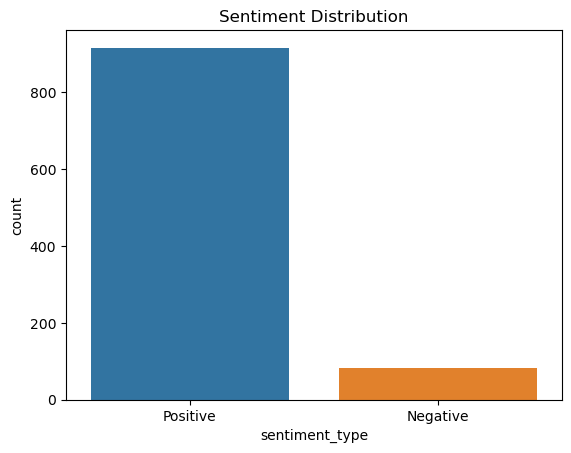

In [24]:
# Sentiment distribution

sns.countplot(data=df, x="sentiment_type")
plt.title("Sentiment Distribution")

In [25]:
# Average rating by sentiment type

df.groupby("sentiment_type")["User_Rating"].mean()

sentiment_type
Negative    28.939759
Positive    29.685932
Name: User_Rating, dtype: float64

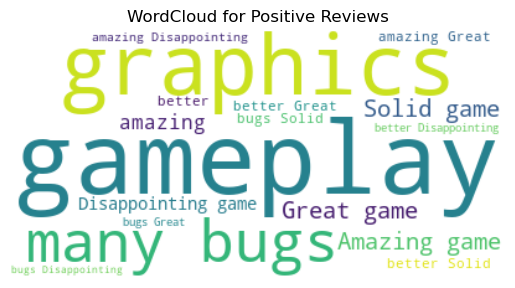

In [26]:
# WordCloud for Positive Reviews

text_pos = " ".join(df[df.sentiment_type == "Positive"]["User_Review_Text"])
wc = WordCloud(background_color='white').generate(text_pos)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Positive Reviews")
plt.show()

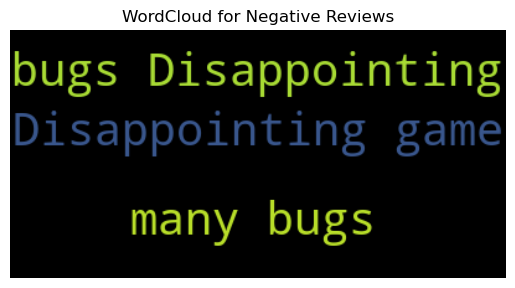

In [27]:
# WordCloud for Negative Reviews

text_neg = " ".join(df[df.sentiment_type == "Negative"]["User_Review_Text"])
wc = WordCloud(background_color='black').generate(text_neg)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Negative Reviews")
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PC'),
  Text(1, 0, 'Mobile'),
  Text(2, 0, 'PlayStation'),
  Text(3, 0, 'Xbox'),
  Text(4, 0, 'Nintendo Switch')])

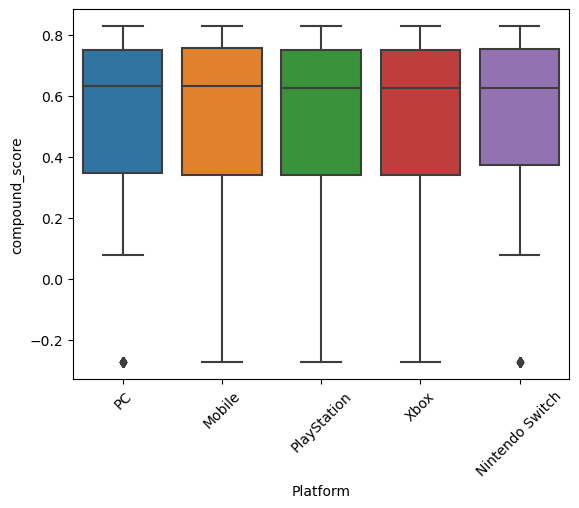

In [28]:
# Sentiment by platform

sns.boxplot(data=df, x="Platform", y="compound_score")
plt.xticks(rotation=45)

<Axes: xlabel='Game_Mode', ylabel='compound_score'>

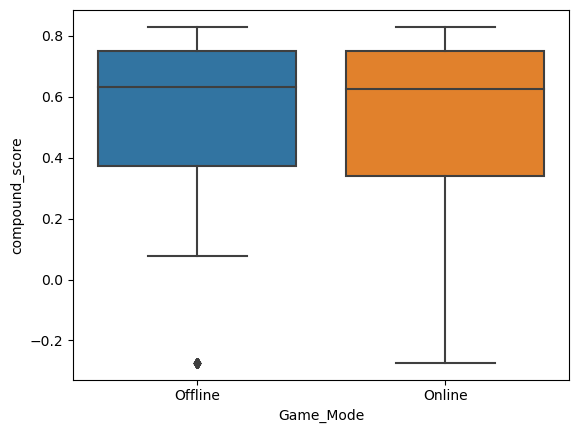

In [29]:
# Sentiment by Game Mode

sns.boxplot(data=df, x="Game_Mode", y="compound_score")

Text(0.5, 1.0, 'Game Length vs Sentiment')

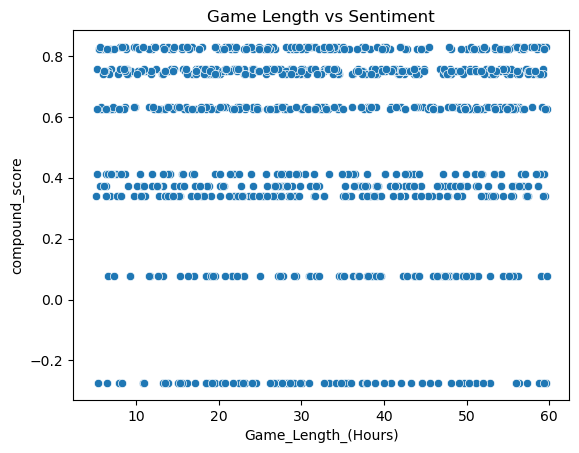

In [30]:
# Does game length influence sentiment?

sns.scatterplot(data=df, x="Game_Length_(Hours)", y="compound_score")
plt.title("Game Length vs Sentiment")

Text(0.5, 1.0, 'Correlation Heatmap')

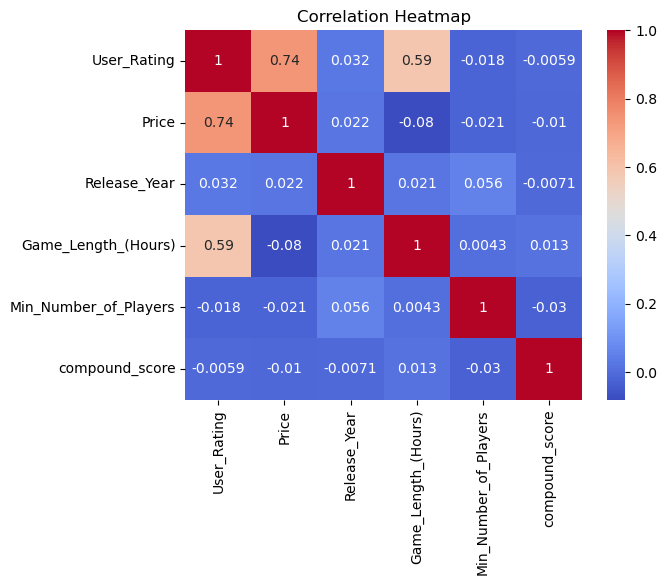

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

In [33]:
# Top 5 Developers by Avg Rating

df.groupby("Developer")["User_Rating"].mean().sort_values(ascending=False).head(5)

Developer
Rockstar Games    30.333333
Bungie            30.245283
Game Freak        30.087719
Innersloth        30.044248
Epic Games        29.727273
Name: User_Rating, dtype: float64

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


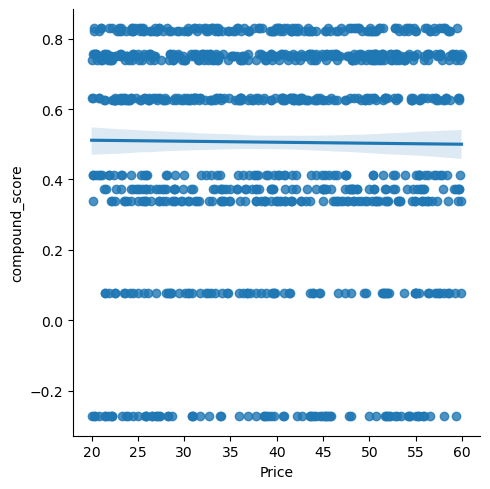

In [34]:
# Price influence on sentiment

sns.lmplot(data=df, x="Price", y="compound_score")

In [35]:
# Average rating of online vs offline

df.groupby("Game_Mode")["User_Rating"].mean()

Game_Mode
Offline    29.411067
Online     29.842105
Name: User_Rating, dtype: float64

In [36]:
# Most mentioned words in all reviews

from collections import Counter

all_words = " ".join(df["User_Review_Text"].dropna()).lower()
all_words = re.sub(f"[{string.punctuation}]", "", all_words)
word_list = all_words.split()
common_words = Counter(word_list).most_common(15)
common_words

[('game', 1000),
 ('but', 1000),
 ('the', 656),
 ('amazing', 590),
 ('too', 344),
 ('many', 344),
 ('bugs', 344),
 ('gameplay', 332),
 ('is', 332),
 ('graphics', 324),
 ('could', 324),
 ('be', 324),
 ('better', 324),
 ('solid', 253),
 ('great', 245)]